In [44]:
#Importing the libraries
import tensorflow as tf
def auto_select_accelerator():
    try:
        tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
        tf.config.experimental_connect_to_cluster(tpu)
        tf.tpu.experimental.initialize_tpu_system(tpu)
        strategy = tf.distribute.experimental.TPUStrategy(tpu)
        print("Running on TPU:", tpu.master())
    except ValueError:
        strategy = tf.distribute.get_strategy()
    print(f"Running on {strategy.num_replicas_in_sync} replicas")
    
    return strategy
strategy = auto_select_accelerator()

# train = pd.read_csv("../input/nlp-getting-started/train.csv")
# test = pd.read_csv("../input/nlp-getting-started/test.csv")

2022-03-23 16:40:33.201507: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-23 16:40:33.234825: I tensorflow/core/distributed_runtime/rpc/grpc_channel.cc:301] Initialize GrpcChannelCache for job worker -> {0 -> 10.0.0.2:8470}
2022-03-23 16:40:33.234915: I tensorflow/core/distributed_runtime/rpc/grpc_channel.cc:301] Initialize GrpcChannelCache for job localhost -> {0 -> localhost:30044}
2022-03-23 16:40:33.255509: I tensorflow/core/distributed_runtime/rpc/grpc_channel.cc:301] Initialize GrpcChannelCache for job worker -> {0 -> 10.0.0.2:8470}
2022-03-23 16:40:33.255598: I tensorflow/core/distributed_runtime/rpc/grpc_channel.cc:301] Initialize GrpcChannelCache for job localhost -> {0 -> localhost:30044}
2022-03-23 16:40:33.256435: I tensorflow/core/distributed_runtime/rpc/grpc_server_lib.cc:411] Started server with target: grpc://localhost:30044


Running on TPU: grpc://10.0.0.2:8470
Running on 8 replicas


In [47]:
#@title
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [28]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.initializers import Constant
from sklearn.model_selection import train_test_split
from nltk import word_tokenize
from tensorflow.keras.optimizers import *
import nltk
import matplotlib.pyplot as plt

from sklearn.metrics import *
import re
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
train = pd.read_csv("../input/nlp-getting-started/train.csv")
test = pd.read_csv("../input/nlp-getting-started/test.csv")

In [30]:
lemma = nltk.WordNetLemmatizer()
def processing(text):
    text = text.lower()
    text = re.sub("\\'", "'", str(text))
    expanded_words = []
    for word in text.split():
        if(word not in set(stopwords.words("english"))): # stopwords 
            fixed = lemma.lemmatize(word) #lemmatization
            expanded_words.append(fixed) 

    text = ' '.join(expanded_words)
    text = re.sub("@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+", ' ', str(text))
    return text


def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def convert_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

def convert_abbrev_in_text(text):
    tokens = word_tokenize(text)
    tokens = [convert_abbrev(word) for word in tokens]
    text = ' '.join(tokens)
    return text


In [31]:
train['text'] = train['text'].apply(lambda x: processing(x))
test['text'] = test['text'].apply(lambda x: processing(x))
train['text'] = train['text'].apply(lambda x: remove_emoji(x))
test['text'] = test['text'].apply(lambda x: remove_emoji(x))
train['text'] = train['text'].apply(lambda x: processing(x))
test['text'] = test['text'].apply(lambda x: processing(x))
train['text'] = train['text'].apply(lambda x: convert_abbrev_in_text(x))
test['text'] = test['text'].apply(lambda x: convert_abbrev_in_text(x))

In [ ]:
embedding_dict={}
with open('../input/glove-embeddings/glove.6B.100d.txt','r') as f:
    for line in f:
        values=line.split()
        word = values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

In [ ]:
def create_corpus_new(df):
    corpus=[]
    for tweet in tqdm(df['text']):
        words=[word for word in word_tokenize(tweet)]
        corpus.append(words)
    return corpus   
corpus = create_corpus_new(train)
MAX_LEN=50
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)

sequences=tokenizer_obj.texts_to_sequences(corpus)
tweet_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')
word_index= tokenizer_obj.word_index

In [ ]:
vocab = len(word_index) +1
embedding_matrix = np.zeros((vocab,100))
for word, token in tqdm(word_index.items()):
    if(word in embedding_dict.keys()):
        embedding_matrix[token] = embedding_dict[word]

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device NOT found')
else:
  print('Found GPU at: {}'.format(device_name))

In [ ]:
model=Sequential()
embedding=Embedding(vocab,100,embeddings_initializer=Constant(embedding_matrix),input_length=MAX_LEN,trainable=False)
model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(70, dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(8,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
optimzer=keras.optimizers.Adam(learning_rate=3e-4)
model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])
model.save_weights(f'model.h5')

In [ ]:
X_train,X_valid,y_train,y_valid = train_test_split(tweet_pad,train['target'].values,test_size=0.2)

In [ ]:
history  = model.fit(X_train,y_train,batch_size=8,epochs=10,validation_data=(X_valid,y_valid),verbose=2)

In [ ]:
test_corpus = create_corpus_new(test)
sequences=tokenizer_obj.texts_to_sequences(test_corpus)
tweet_test_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

In [ ]:
from sklearn.metrics import *
preds  = model.predict(X_valid)
predictions = np.where(preds>=0.5,1,0)

print("F1 score on the test set is {}".format(f1_score(predictions,y_valid,average='macro')))

In [ ]:
from sklearn.metrics import *
preds  = model.predict(tweet_test_pad)
final_predictions = np.where(preds>=0.5,1,0)


In [ ]:
test['target']=final_predictions
submission = test[['id','target']]
submission.to_csv("submission-glove-lstm",index=False)

## Fine tune distillbert

In [32]:
X_train,X_valid,y_train,y_valid = train_test_split(train['text'],train['target'].values,test_size=0.2)

In [33]:
BATCH_SIZE = 16
max_len = 70

In [ ]:
from transformers import AutoTokenizer, DistilBertTokenizerFast
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

train_encodings = tokenizer(X_train.to_list(), truncation=True, max_length=max_len, padding="max_length", return_tensors='tf')
val_encodings = tokenizer(X_valid.to_list(), truncation=True, max_length=max_len, padding="max_length", return_tensors='tf')

train_tf_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), y_train))
train_tf_dataset = train_tf_dataset.shuffle(len(train_encodings)).batch(BATCH_SIZE)

eval_tf_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings), y_valid))
eval_tf_dataset = eval_tf_dataset.batch(BATCH_SIZE)

In [ ]:
def create_model(transformer):
    for layer in transformer.layers:
        layer.trainable = True
    # Input layers
    input_ids_layer = keras.Input(shape =(max_len,), dtype=tf.int32, name='input_ids') 
    input_attention_layer = keras.Input(shape=(max_len,),dtype=tf.int32, name='attention_mask')  
    
    last_hidden_state = transformer([input_ids_layer, input_attention_layer])[0]
    cls_token = last_hidden_state[:, 0, :]
    #Hidden layers
#     output = keras.layers.Dense(8,kernel_initializer=keras.initializers.GlorotUniform(seed=1),  kernel_constraint=None,
#                                 bias_initializer='zeros',
#                                 activation='relu')(cls_token)
#     output = keras.layers.Dropout(0.2)(output)
#     #output = keras.layers.Dense(8, activation = 'relu')(output)
    output = keras.layers.Dense(1, activation='sigmoid')(cls_token)
    # Define the model 
    model = keras.Model([input_ids_layer, input_attention_layer], output)
    return model

from transformers import TFDistilBertModel, DistilBertConfig
BERT_DROPOUT = 0.2
BERT_ATT_DROPOUT = 0.2
config = DistilBertConfig(dropout=BERT_DROPOUT, attention_dropout=BERT_ATT_DROPOUT, output_hidden_states=True)

In [ ]:
lr=1e-5
with strategy.scope():
    DistilBERTmodel = TFDistilBertModel.from_pretrained('distilbert-base-uncased', config=config)
    model = create_model(DistilBERTmodel)
    model.compile(keras.optimizers.Adam(lr), loss="binary_crossentropy",metrics=['accuracy'])
    
early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3, restore_best_weights=True)

history = model.fit(train_tf_dataset,epochs=10,batch_size=BATCH_SIZE,
                           validation_data=eval_tf_dataset,callbacks = [early_stop], verbose=2)

In [ ]:
test_encoding = tokenizer(test['text'].tolist(), truncation=True, max_length=max_len, padding="max_length", return_tensors='tf')
predictions = model.predict(test_encoding.data, batch_size=BATCH_SIZE, verbose = 2)
preds = np.where(predictions >= 0.5, 1, 0)

In [ ]:
test['target']=preds
submission = test[['id','target']]
submission.to_csv("submission-bert-fine-tune-5",index=False)

## Roberta

In [48]:
X_train,X_valid,y_train,y_valid = train_test_split(train['text'],train['target'].values,test_size=0.2)

In [49]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('roberta-base')
AUTO = tf.data.experimental.AUTOTUNE
lr=1e-5
BATCH_SIZE = 16

In [50]:
def regular_encode(texts, tokenizer, maxlen=70):
    enc_di = tokenizer.batch_encode_plus(
        texts,  
        return_token_type_ids=False,
        pad_to_max_length=True,
        max_length=maxlen
    )
    
    return np.array(enc_di['input_ids'])

def build_model(transformer, max_len=70):
    for layer in transformer.layers:
        layer.trainable = True
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]
    out = Dense(1, activation='sigmoid')(cls_token)
    model = keras.Model(inputs=input_word_ids, outputs=out)
    
    return model

In [51]:
##tokenizing
X_train_encoded= regular_encode(X_train.to_list(), tokenizer, maxlen=max_len)
X_valid_encoded = regular_encode(X_valid.to_list(), tokenizer, maxlen=max_len)

train_tf_dataset = (
    tf.data.Dataset.from_tensor_slices((X_train_encoded, y_train))
    .repeat()
    .shuffle(1995)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

eval_tf_dataset = (
    tf.data.Dataset
    .from_tensor_slices((X_valid_encoded, y_valid))
    .batch(BATCH_SIZE)
    .cache()
    .prefetch(AUTO)
)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [52]:
from transformers import TFAutoModel
with strategy.scope():
    roberta = TFAutoModel.from_pretrained('roberta-base')
    model_roberta = build_model(roberta)
    model_roberta.compile(keras.optimizers.Adam(lr), loss="binary_crossentropy",metrics=['accuracy'])

Downloading:   0%|          | 0.00/657M [00:00<?, ?B/s]

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [59]:
import tensorflow_addons as tfa
tqdm_callback = tfa.callbacks.TQDMProgressBar()

n_steps = X_train.shape[0] ##this is new to be passed in roberta
early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3, restore_best_weights=True)

history = model_roberta.fit(train_tf_dataset,epochs=5,steps_per_epoch=n_steps,batch_size=BATCH_SIZE,
                           validation_data=eval_tf_dataset,callbacks = [early_stop, tqdm_callback], verbose=2)

Training:   0%|           0/5 ETA: ?s,  ?epochs/s

Epoch 1/5
Epoch 1/5


0/6090           ETA: ?s - 

6090/6090 - 371s - loss: 0.2626 - accuracy: 0.8856 - val_loss: 0.9854 - val_accuracy: 0.7978
Epoch 2/5
Epoch 2/5


0/6090           ETA: ?s - 

6090/6090 - 295s - loss: 0.0603 - accuracy: 0.9737 - val_loss: 1.3255 - val_accuracy: 0.7932
Epoch 3/5
Epoch 3/5


0/6090           ETA: ?s - 

6090/6090 - 295s - loss: 0.0408 - accuracy: 0.9806 - val_loss: 1.6515 - val_accuracy: 0.8056
Epoch 4/5
Epoch 4/5


0/6090           ETA: ?s - 

6090/6090 - 297s - loss: 0.0355 - accuracy: 0.9826 - val_loss: 1.5134 - val_accuracy: 0.8011
Epoch 5/5
Epoch 5/5


0/6090           ETA: ?s - 

6090/6090 - 301s - loss: 0.0323 - accuracy: 0.9838 - val_loss: 1.2028 - val_accuracy: 0.8050


In [60]:
try:
    test.drop(['target'],axis=1,inplace=True)
except:
    pass

In [61]:
test_encoded= regular_encode(test['text'].to_list(), tokenizer, maxlen=max_len)
predictions = model_roberta.predict(test_encoded, batch_size=BATCH_SIZE, verbose = 2)
preds = np.where(predictions >= 0.5, 1, 0)

test['target']=preds
submission = test[['id','target']]
submission.to_csv("submission-roberta-4",index=False)

204/204 - 9s


<AxesSubplot:ylabel='Count'>

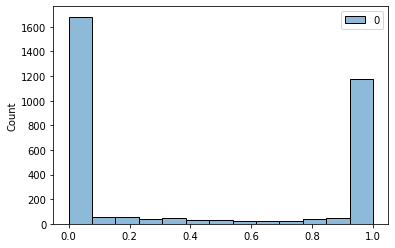

In [64]:
import seaborn as sns
sns.histplot(predictions)

In [62]:
submission

,id,target
0,0,0
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1
